# assessment of correlation between replicates using different snp window sizes

## This suggests 100 snp windows (which we used in the preprint) are too small. 500 snp windows provides much high correlation while still maintain reasonably small physical window sizes (~100Kb).

In [1]:
library(unglue)
library(tidyverse)
library(patchwork)
library(glue)
options(repr.plot.width=10, repr.plot.height=10)
theme_set(theme_classic(20))

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




In [2]:
overlap_files <- fs::dir_ls("overlaps/")
head(overlap_files)

overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.005_merge100000.txt
overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.005_merge1000000.txt
overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.005_merge200000.txt
overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.005_merge2000000.txt
overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.005_merge500000.txt
overlaps/Palmar_Chico_chrom1_window100_maf0.05_quantile0.01_merge100000.txt

In [3]:
overlap_files <- fs::dir_ls("overlaps/")

suppressMessages(suppressWarnings(
#count up sweep stuff for each rep, pop, and total
grid_df <- overlap_files %>% 
map_df(~{
    df  <- vroom::vroom(.x, col_names = c("chrom", "start", "end", "size", "files")) %>%
    summarise(
         total = n(),
         LR = sum(grepl("LR", files)), 
         Teo = sum(grepl("Teo", files)),
         LR_shared = sum(grepl("LR--random1", files) & grepl("LR--random2", files)),
         Teo_shared = sum(grepl("Teo--random1", files) & grepl("Teo--random2", files)),        
         LR_random1 = sum(grepl("LR--random1", files)),
         LR_random2 = sum(grepl("LR--random2", files)),
         Teo_random1 = sum(grepl("Teo--random1", files)),
         Teo_random2 = sum(grepl("Teo--random2", files))
         ) %>% 
    mutate(LR_prop = LR_shared/LR, Teo_prop = Teo_shared/Teo, mean_prop = (LR_prop + Teo_prop)/2)
#if(nrow(df) > 0){
    meta <- unglue(.x, "overlaps/Palmar_Chico_chrom1_window{window}_maf{maf}_quantile{quantile}_merge{merge}.txt")  %>% 
    map_df(function(x) x)
    df <- mutate(df, meta) %>% mutate(window = as.numeric(window), maf = as.numeric(maf), quantile = as.numeric(quantile), merge = as.numeric(merge))
#}
})
))


total,LR,Teo,LR_shared,Teo_shared,LR_random1,LR_random2,Teo_random1,Teo_random2,LR_prop,Teo_prop,mean_prop,window,maf,quantile,merge,scale_prop
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,40,40,37,36,38,39,39,37,0.9250000,0.9000000,0.9125000,10,0.05,0.200,2e+05,1.4996506
46,43,40,38,37,40,41,38,39,0.8837209,0.9250000,0.9043605,10,0.00,0.200,2e+05,1.5037324
28,24,28,24,22,24,24,27,23,1.0000000,0.7857143,0.8928571,10,0.05,0.050,5e+05,1.2921054
23,21,21,18,19,19,20,20,20,0.8571429,0.9047619,0.8809524,10,0.00,0.050,5e+05,1.1996174
61,50,56,46,41,48,48,50,47,0.9200000,0.7321429,0.8260714,10,0.05,0.030,5e+05,1.4748100
28,26,24,20,20,23,23,24,20,0.7692308,0.8333333,0.8012821,10,0.05,0.010,1e+06,1.1595818
83,71,72,58,56,67,62,64,64,0.8169014,0.7777778,0.7973396,24,0.00,0.100,5e+05,1.5301569
51,37,43,31,32,33,35,38,37,0.8378378,0.7441860,0.7910119,24,0.00,0.030,1e+06,1.3507084
84,69,72,55,55,66,58,63,64,0.7971014,0.7638889,0.7804952,24,0.05,0.100,5e+05,1.5018907


total,LR,Teo,LR_shared,Teo_shared,LR_random1,LR_random2,Teo_random1,Teo_random2,LR_prop,Teo_prop,mean_prop,window,maf,quantile,merge,scale_prop
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
58,53,13,28,4,41,40,10,7,0.5283019,0.30769231,0.4179971,100,0.05,0.01,2e+06,0.7371078
101,92,19,37,4,67,62,15,8,0.4021739,0.21052632,0.3063501,100,0.05,0.01,1e+06,0.6140241
123,111,20,38,3,79,70,15,8,0.3423423,0.15000000,0.2461712,100,0.05,0.01,5e+05,0.5144744
163,144,27,40,4,98,86,19,12,0.2777778,0.14814815,0.2129630,100,0.05,0.01,2e+05,0.4711140
220,194,35,56,3,131,119,25,13,0.2886598,0.08571429,0.1871870,100,0.05,0.01,1e+05,0.4384712


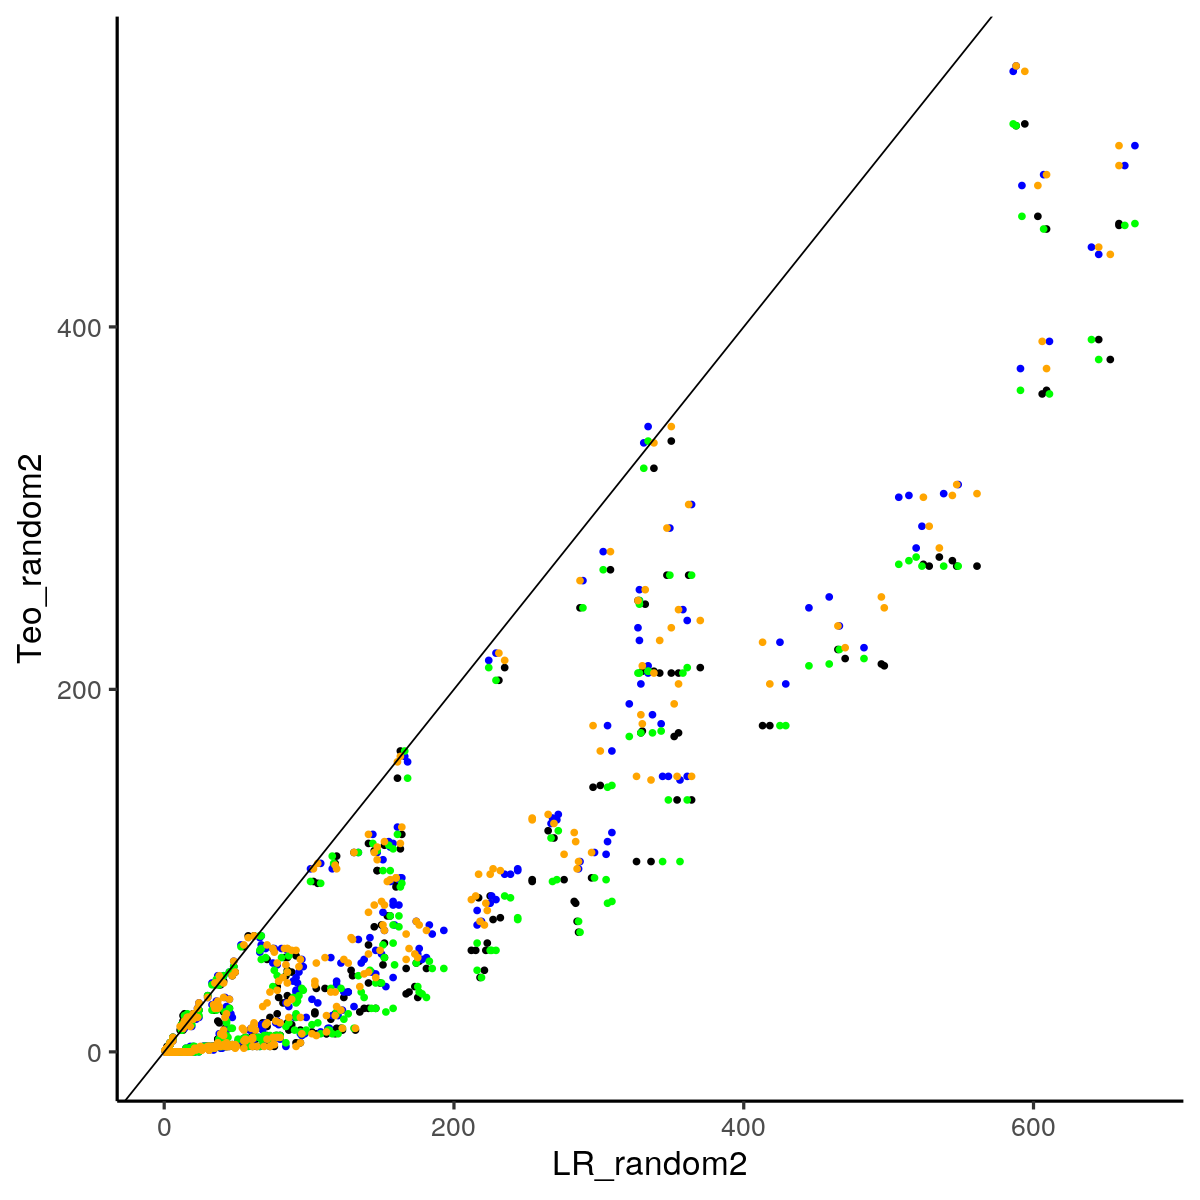

In [10]:
grid_df %>% 
    mutate(scale_prop = log10(total) * mean_prop) %>% 
    arrange(desc(mean_prop)) %>%
    filter(total > 20) %>% 
    head(100)

grid_df %>% 
    mutate(scale_prop = log10(total) * mean_prop) %>% 
    arrange(desc(mean_prop)) %>%
    filter(window == 100, maf == 0.05, quantile == 0.01)


grid_df %>% 
    mutate(ratio = LR_random2/Teo_random2)  %>% 
    ggplot() +
    geom_point(aes(LR_random2, Teo_random2)) +
    geom_point(aes(LR_random1, Teo_random1), col = "blue") +
    geom_point(aes(LR_random1, Teo_random2), col = "green") +
    geom_point(aes(LR_random2, Teo_random1), col = "orange") +
    geom_abline(intercept = 0, slope = 1)

In [15]:
mean(grid_df$mean_prop, na.rm=T)

[1] 0.4593562

In [ ]:
#jeff meeting notes
#anything interesting about params near 1 to 1?


#use sims to support biological reasons for false positives
#use grid search, parameter choices matter, but global average is similar to our initial parameter choices 
#rdmc is independent check and agrees
#meaningful number of teo sweeps shared, but hard to know exact numbers